In [ ]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_file_path = "/content/wavefiles"
WAV_audio_clips = os.listdir(audio_file_path)
print(WAV_audio_clips)
print("No. of .wav files in audio folder = ",len(WAV_audio_clips)-1) 

['New Recording 15.wav', 'sq8_a1_d2.wav', '.ipynb_checkpoints']
No. of .wav files in audio folder =  2


In [ ]:
librosa_au_fi, sr = librosa.load(audio_file_path+"/"+WAV_audio_clips[0], sr=44100) #first arg is the wav audio file path
#print(type(x), type(sr))
from IPython.display import Audio, IFrame, display
display(Audio(librosa_au_fi,rate=sr))
print(librosa_au_fi.shape, sr)

(380084,) 44100


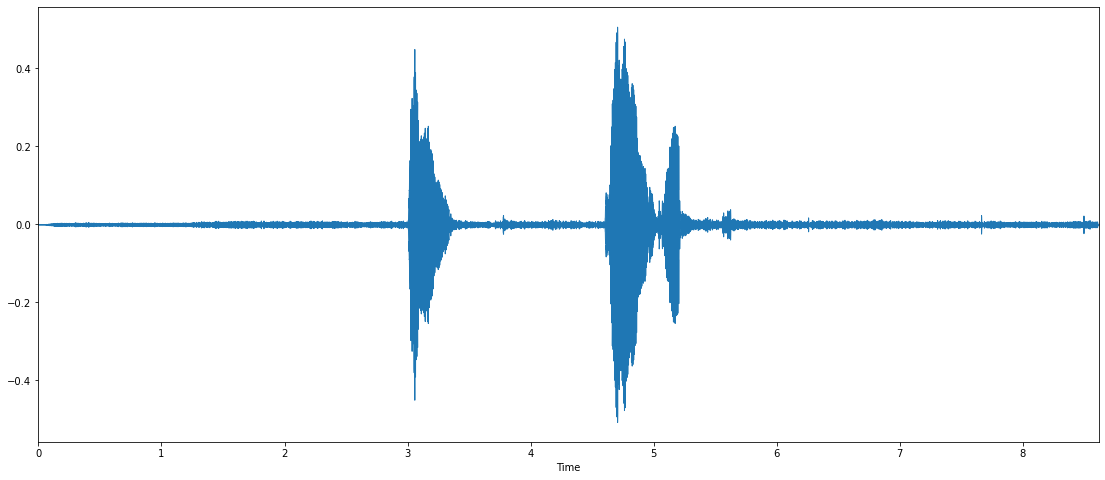

In [ ]:
plt.figure(figsize=(19, 8))
librosa.display.waveplot(librosa_au_fi, sr=sr)

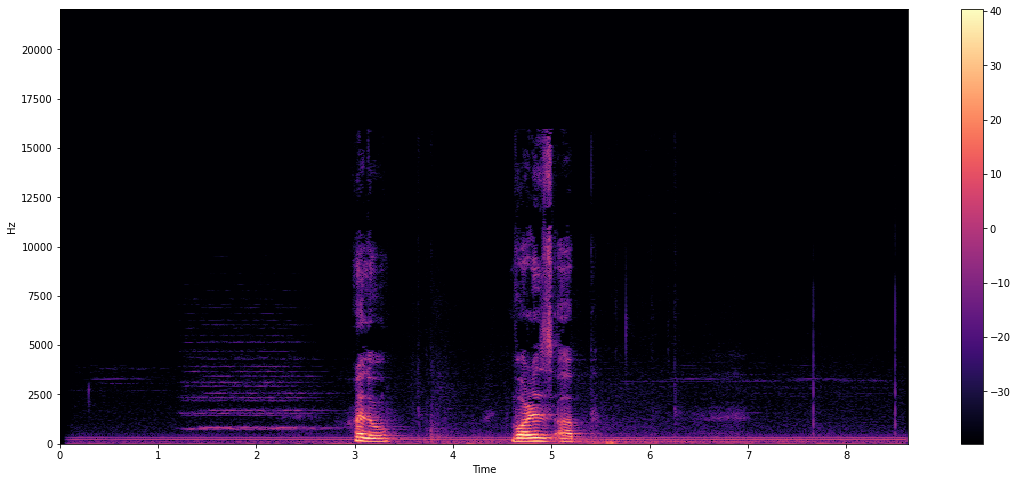

In [ ]:
stft_au_fi = librosa.stft(librosa_au_fi)
Xdb = librosa.amplitude_to_db(abs(stft_au_fi))
plt.figure(figsize=(19, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

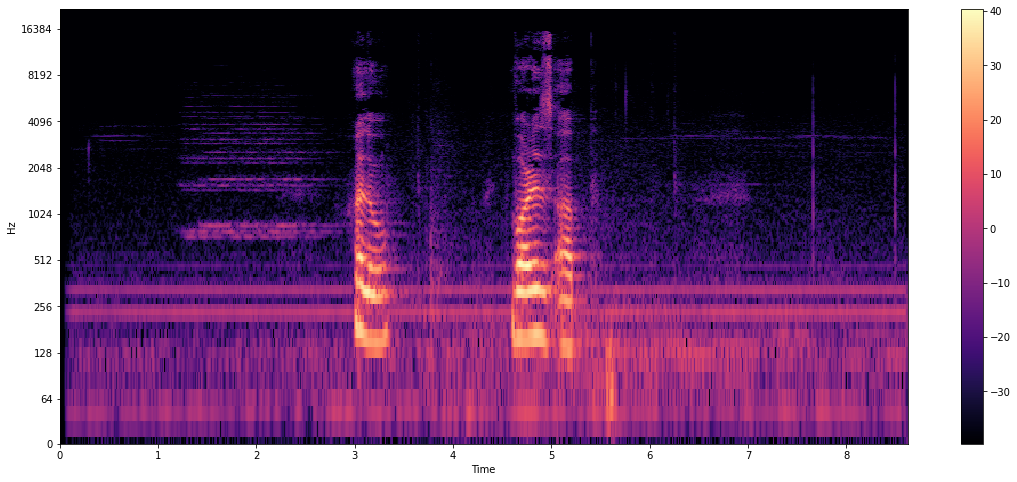

In [ ]:
plt.figure(figsize=(19, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
#based on kaggle's code on audio file to spectrogram at link: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

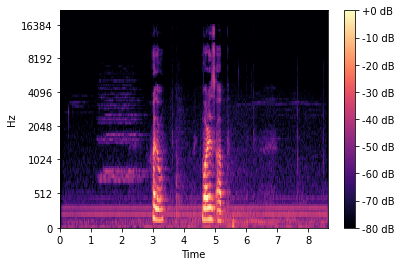

In [ ]:
import numpy as np
S = librosa.feature.melspectrogram(librosa_au_fi, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
# code inspired and borrowed from https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

In [ ]:
Dp1 = librosa.pcen(S * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)

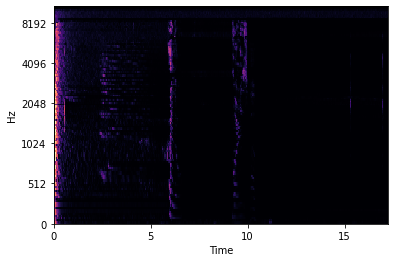

In [ ]:
librosa.display.specshow(Dp1, x_axis='time', y_axis='mel');

In [ ]:
yp1 = librosa.feature.inverse.mel_to_audio(Dp1)

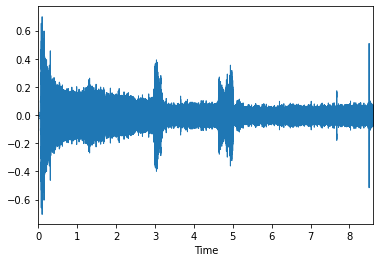

In [ ]:
librosa.display.waveplot(yp1,sr=sr, x_axis='time');

In [ ]:
display(Audio(yp1,rate=sr))
#https://www.kaggle.com/code/mauriciofigueiredo/methods-for-sound-noise-reduction